In [21]:
import numpy as np
from utils.helpers import load_config
from utils.helpers import sys_params_gen as params_gen
from utils.helpers import initial_conditions_gen as ic_gen
from data_generation.binder import Binder  
from data_generation.tsdg import Sistema  
from tqdm import tqdm

In [22]:
def isolated():
    print("\n=== DEBUGGING: STARTING isolated() FUNCTION ===")

    # Parameters
    sigma_val = 10.0
    beta_val = 8.0 / 3.0
    rho_val = 28.0
    params = (sigma_val, beta_val, rho_val)
    print(f"Parameters: {params}")

    # Initial conditions
    y0 = [1.0, 1.0, 1.0]
    print(f"Initial Conditions: {y0}")

    # Use Binder to fix parameters
    binder = Binder("systems.lorenz63", "lorenz63", params)
    binder.import_module()
    lorenz_fixed = binder.fixer()  # Now this is a partially applied function
    print(f"Binder fixed function: {lorenz_fixed}")

    # Time range
    t = np.linspace(0, 105, 735)
    print(f"Time range: {t.shape}, Min: {t.min()}, Max: {t.max()}")

    # Solve the system
    edo = Sistema(lorenz_fixed, y0=y0, t=t, metodo="RK45")
    print(f"Sistema instance created: {edo}")

    edo.resolver()
    print("Solver finished.")

    edo.graficar(tipo='series', guardar=False, show_plot=True)
    print("Plotting finished.")

    print("\n=== DEBUGGING: END OF isolated() FUNCTION ===\n")


=== DEBUGGING: STARTING isolated() FUNCTION ===
Parameters: (10.0, 2.6666666666666665, 28.0)
Initial Conditions: [1.0, 1.0, 1.0]
Module systems.lorenz63 imported successfully.
Binder fixed function: functools.partial(<function lorenz63 at 0x7bbb38048900>, 10.0, 2.6666666666666665, 28.0)
Time range: (735,), Min: 0.0, Max: 105.0
Sistema instance created: <data_generation.tsdg.Sistema object at 0x7bbaf1b93b00>
Solver finished.


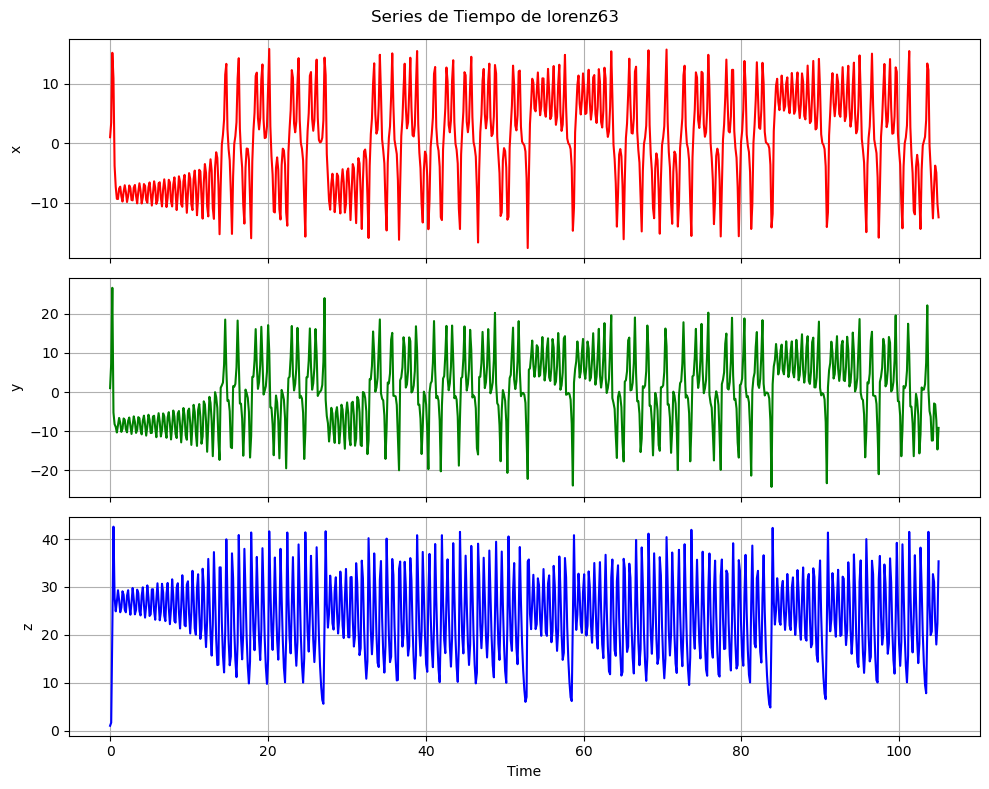

Plotting finished.

=== DEBUGGING: END OF isolated() FUNCTION ===



In [23]:
isolated()

In [25]:
# Ask for configuration file, or make one
# /home/think/Desktop/TESIS/test_runs/test_3/test3.json
config_data = load_config()


Loading configuration...
Configuration loaded



=== DEBUGGING: EXTRACTING VARIABLES FROM CONFIG ===
Test number: 4
Parent model: lorenz63
Number of child systems: 1
Raw parameters: {'sigma': {'min': 10, 'max': 15}, 'beta': {'min': 2.66666666, 'max': 7}, 'rho': {'min': 28.5, 'max': 70}}
Raw initial conditions: {'x': {'min': 1.0, 'max': 5.0}, 'y': {'min': 1.0, 'max': 3.5}, 'z': {'min': 1.0, 'max': 4.0}}
Raw t_span: {'start': 0, 'end': 105}
Number of points: 735
Generated systems_params_dict: {'system_0_params': (10, 2.66666666, 28.5), 'system_1_params': (15.0, 7.0, 70.0)}
Generated systems_initial_dict: {'initial_condition_0': [1.0, 1.0, 1.0], 'initial_condition_1': [5.0, 3.5, 4.0]}
Processed t_span: (0, 105), Type: <class 'tuple'>
Time evaluation array: Shape: (735,), Min: 0.0, Max: 105.0
System 0 Parameters: (10, 2.66666666, 28.5)
Initial Condition 0: [1.0, 1.0, 1.0]
Module systems.lorenz63 imported successfully.
Fixed function created: functools.partial(<function lorenz63 at 0x7bbb38048900>, 10, 2.66666666, 28.5)
Sistema instance 

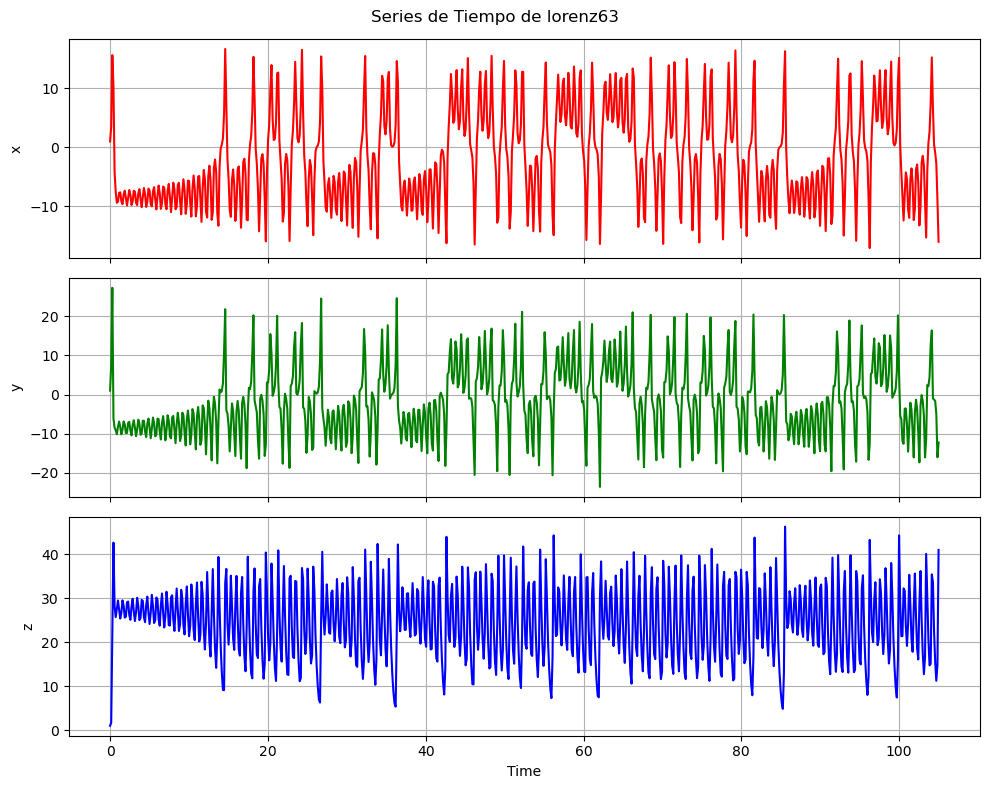

Plotting finished.

=== DEBUGGING: END OF SCRIPT ===



In [26]:
# Extract the variables we need from the config
print("\n=== DEBUGGING: EXTRACTING VARIABLES FROM CONFIG ===")
test_number = config_data["test_number"]
parent_model = config_data["parent_model"]  
number_of_child_systems = config_data["number_of_child_systems"]  
params = config_data["params"]
initial_conditions = config_data["initial_conditions"]  
t_span = config_data["t_span"]  
num_points = config_data["num_points"]  

print(f"Test number: {test_number}")
print(f"Parent model: {parent_model}")
print(f"Number of child systems: {number_of_child_systems}")
print(f"Raw parameters: {params}")
print(f"Raw initial conditions: {initial_conditions}")
print(f"Raw t_span: {t_span}")
print(f"Number of points: {num_points}")

# Parameters for each system
systems_params_dict = params_gen(params, number_of_child_systems)
print(f"Generated systems_params_dict: {systems_params_dict}")

# Initial conditions for each system
systems_initial_dict = ic_gen(initial_conditions, number_of_child_systems)
print(f"Generated systems_initial_dict: {systems_initial_dict}")

# Set time span for solving
t_span = (t_span["start"], t_span["end"])
print(f"Processed t_span: {t_span}, Type: {type(t_span)}")

# Ensure t_eval is the same as the working version
t_eval = np.linspace(0, 105, 735)
print(f"Time evaluation array: Shape: {t_eval.shape}, Min: {t_eval.min()}, Max: {t_eval.max()}")

# Extract system parameters
system_params = systems_params_dict["system_0_params"]
initial_condition = systems_initial_dict["initial_condition_0"]

print(f"System 0 Parameters: {system_params}")
print(f"Initial Condition 0: {initial_condition}")

# Bind system function
binder = Binder(module_name=f"systems.{parent_model}", 
                function_name=parent_model, 
                params=system_params)
binder.import_module()
fixed_function = binder.fixer()
print(f"Fixed function created: {fixed_function}")

# Create system instance
sistema = Sistema(f=fixed_function, 
                  y0=initial_condition, 
                  t=t_eval, 
                  metodo='RK45')

print(f"Sistema instance created: {sistema}")

# Solve the system
sistema.resolver()
print("Solver finished.")

# Plot results
sistema.graficar(tipo='series', guardar=False, show_plot=True)
print("Plotting finished.")

print("\n=== DEBUGGING: END OF SCRIPT ===\n")


# Create a tqdm progress bar
total_systems = len(systems_params_dict)  # Total iterations
with tqdm(total=total_systems, desc="Processing systems", unit="system") as pbar:
    for (k1, v1), (k2, v2) in zip(systems_params_dict.items(), systems_initial_dict.items()):
        
        # Initialize the Binder object for dynamic function import
        binder = Binder(module_name=f"systems.{parent_model}", 
                        function_name=parent_model, 
                        params=v1)
        
        # Import the module
        binder.import_module()
        
        # Prepare the function
        fixed_function = binder.fixer()
        
        if fixed_function:  
            # Now we have the fixed function ready, so we can pass it to Sistema
            sistema = Sistema(f=fixed_function, 
                              y0=v2, 
                              t=t_eval, 
                              metodo='RK45')
            
            # Solve the system
            sistema.resolver()
            sistema.graficar(tipo='series', guardar=False, show_plot=True)
            # Get the DataFrame for the solution
            #df = sistema.csv_or_dataframe(f"/home/think/Desktop/TESIS/test_runs/test_{str(test_number)}/{str(k1)}.csv")
                
        pbar.update(1)  # Increment progress bar